
Ejercicio 6.1.15

# Importar Librerías

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Leer Archivo

In [4]:
archivo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRSa9oM9fC-QlT7VOeGhZQtrWnlNSTsk3U8DWGTOXUWtPH6u9o5O5eZ0kTg8mFTwAn9vMdGRK7o2SPB/pub?gid=164226711&single=true&output=csv")
archivo.head(5)

,period,year,quarter,messages_count,quarter_desc
0,1,2013,1,36430004057,Ene-Mar 2013
1,2,2013,2,34255065773,Abr-Jun 2013
2,3,2013,3,33217669903,Jul-Sept 2013
3,4,2013,4,22547130953,Oct-Dic 2013
4,5,2014,1,18393198881,Ene-Mar 2013


# Inspeccion

## Cantidad de columnas

In [5]:
len(archivo)

37

###Cantidad de filas

In [6]:
len(archivo.columns)

5

## Comprobar que no existan datos vacios

In [7]:
archivo.isnull().sum()

period            0
year              0
quarter           0
messages_count    0
quarter_desc      0
dtype: int64

# ¿Cuál es la correlación entre period y messages_count, en términos absolutos? Calculala usando el método de Spearman

La correlacion entre period y messages_cont -0.996444

## METODO 1 : Generar una matriz de correlaciones entre las tablas

In [8]:
correlaciones = archivo.corr()
correlaciones["period"]

C:\Users\Bonnie\AppData\Local\Temp\ipykernel_10248\4116957605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = archivo.corr()


period            1.000000
year              0.994414
quarter           0.040346
messages_count   -0.862134
Name: period, dtype: float64

## METODO 2 : Spearman

In [9]:
archivo.corr('spearman')['period']

C:\Users\Bonnie\AppData\Local\Temp\ipykernel_10248\780596169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  archivo.corr('spearman')['period']


period            1.000000
year              0.994651
quarter           0.039661
messages_count   -0.996444
Name: period, dtype: float64

# ¿Cómo es la relación entre estas dos variables?

Son inversamente proporcionales

# ¿Cuál es el valor p (p-value) de esta correlación?

Menor a 0.0001

In [10]:
# función spearmanr de scipy
spearmanr(archivo['period'], archivo['messages_count'])

SignificanceResult(statistic=-0.9964438122332858, pvalue=3.3496445475770436e-39)

# ¿Es signitiva esta relación?

Existe una relacion y es significativa

# Si separás los datos en entrenamiento y prueba con train_size = 0.75 y random_state = 13 y ajustás un modelo de regresión lineal sobre estas dos variables, ¿cuál es su RMSEnormalizado?

In [11]:
X = archivo[['period']]
y = archivo['messages_count']

# la función train_test_split de scikit-learn, que particionará nuestras X e y, cada una, en dos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
  X.values.reshape(-1,1),
  y.values,
  train_size = 0.75,
  random_state = 13,  
  shuffle = True
)

# usaremos el par (X_train, y_train) para ajustar los coeficientes de nuestro regresor
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)
print("Ordenada:", modelo.intercept_)
print("Pendiente:", list(zip(X.columns, modelo.coef_.flatten())))
print("Coeficiente de determinación R²:", modelo.score(X_test, y_test))

Ordenada: 25103818402.675724
Pendiente: [('period', -835717172.4163337)]
Coeficiente de determinación R²: 0.7106326454825117


RSME : 3978163163.6303334

In [12]:
y_pred = modelo.predict(X = X_test)

rmse = mean_squared_error(
  y_true  = y_test,
  y_pred  = y_pred,
  squared = False
)

print("RMSE:", rmse)

RMSE: 3978163163.6303334


RMSE normalizado: 0.11149153477082895

In [13]:
def normalizar_rmse(rmse, y):
  return rmse / (max(y) - min(y))

normalizar_rmse(rmse, y)

0.11149153477082895

# GRafico del modelo

<Axes: xlabel='period', ylabel='messages_count'>

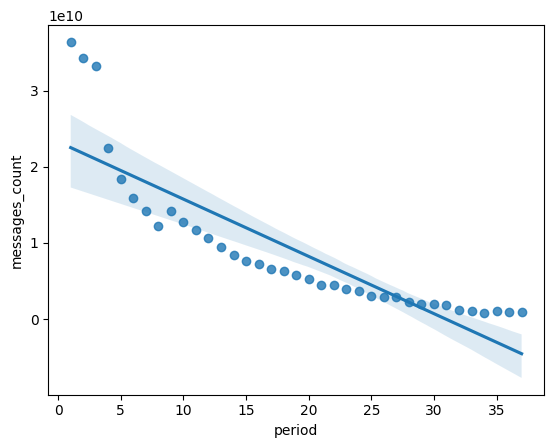

In [23]:
sns.regplot(x="period", y="messages_count", data=archivo)